<a href="https://colab.research.google.com/github/uvaroall/diamonds/blob/main/diamonds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook для задания 1

# Постановка задачи

**Проанализировать зависимости внутри набора данных о бриллиантах**

1. *Карат - это мера веса бриллианта. Один карат эквивалентен 0,2 грамма.*
2. *Огранка имеет 5 уровней: "Допустимая", "Хорошая", "Очень хорошая", "Премиум", "Идеальная". Обозначает превращение необработанного алмаза в симметричные и светящиеся бриллианты.*
3. *Бесцветные бриллианты считаются лучше, чем бриллианты с желтым оттенком. Градация включает в себя 7 уровней. Бриллианты "D" - "F" считаются бесцветными, а бриллианты "G" - "J" имеют очень слабый цвет.*
2. *Чистота имеет 8 уровней, от "I1" (наихудший) до "IF" (наилучший). Чем меньше и менее заметны недостатки бриллианта, тем выше его чистота.*
3. *x, y, z, depth и table - различные показатели размера бриллианта в миллиметрах.*

**Основными характеристиками будем считать количество карат (carat), цветность (color), чистоту (clarity), стоимость (cost).**

Источник данных: https://www.kaggle.com/datasets/joebeachcapital/diamonds

# Подключение библиотек, чтение данных из файла, оценка полноты набора данных

In [59]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
%matplotlib inline
import random
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Проверка базовых характеристик набора данных  

* Определяем размер датафрейма  
* Результат проверки типа данных в столбцах: есть объекты Object, потребуется применение категориальных переменных
* Результат проверки пустых ячеек: 0 пустых ячеек, дополнительная обработка массива данных не нужна



In [58]:
df.shape

(53940, 10)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [35]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

# Визуализации и экспресс-аналитика

Рассмотрим облака точек параметров, сопоставленных каратности и стоимости бриллиантов.

Интерена диаграмма зависимости цены от каратности: с одной стороны, очевидна положительная корелляция этих параметров (тяжёлый бриллиант больше стоит). С другой стороны, видно, что бриллианты меньшей массы могут стоить наравне с образцами в 3 раза тяжелее их -- следовательно, они хороши и по остальных характеристикам. Если тяжёлый бриллиант стоит ниже ожидаемого, вероятно, у него будут недостатки материала или огранки.

Эта мысль дополняется остальными диаграммами, демонстрирующими возможность комбинаций всех параметров со всеми.

Теоретически из набора данных могут быть исключены колонки x, y, z, depth и table, так как комбинация габаритных характеристик через плотность связана с каратностью бриллианта. Однако мы предполагаем, что комбинация этих параметров может дополнять данные об огранке кристаллов, поэтому исключать их не будем.

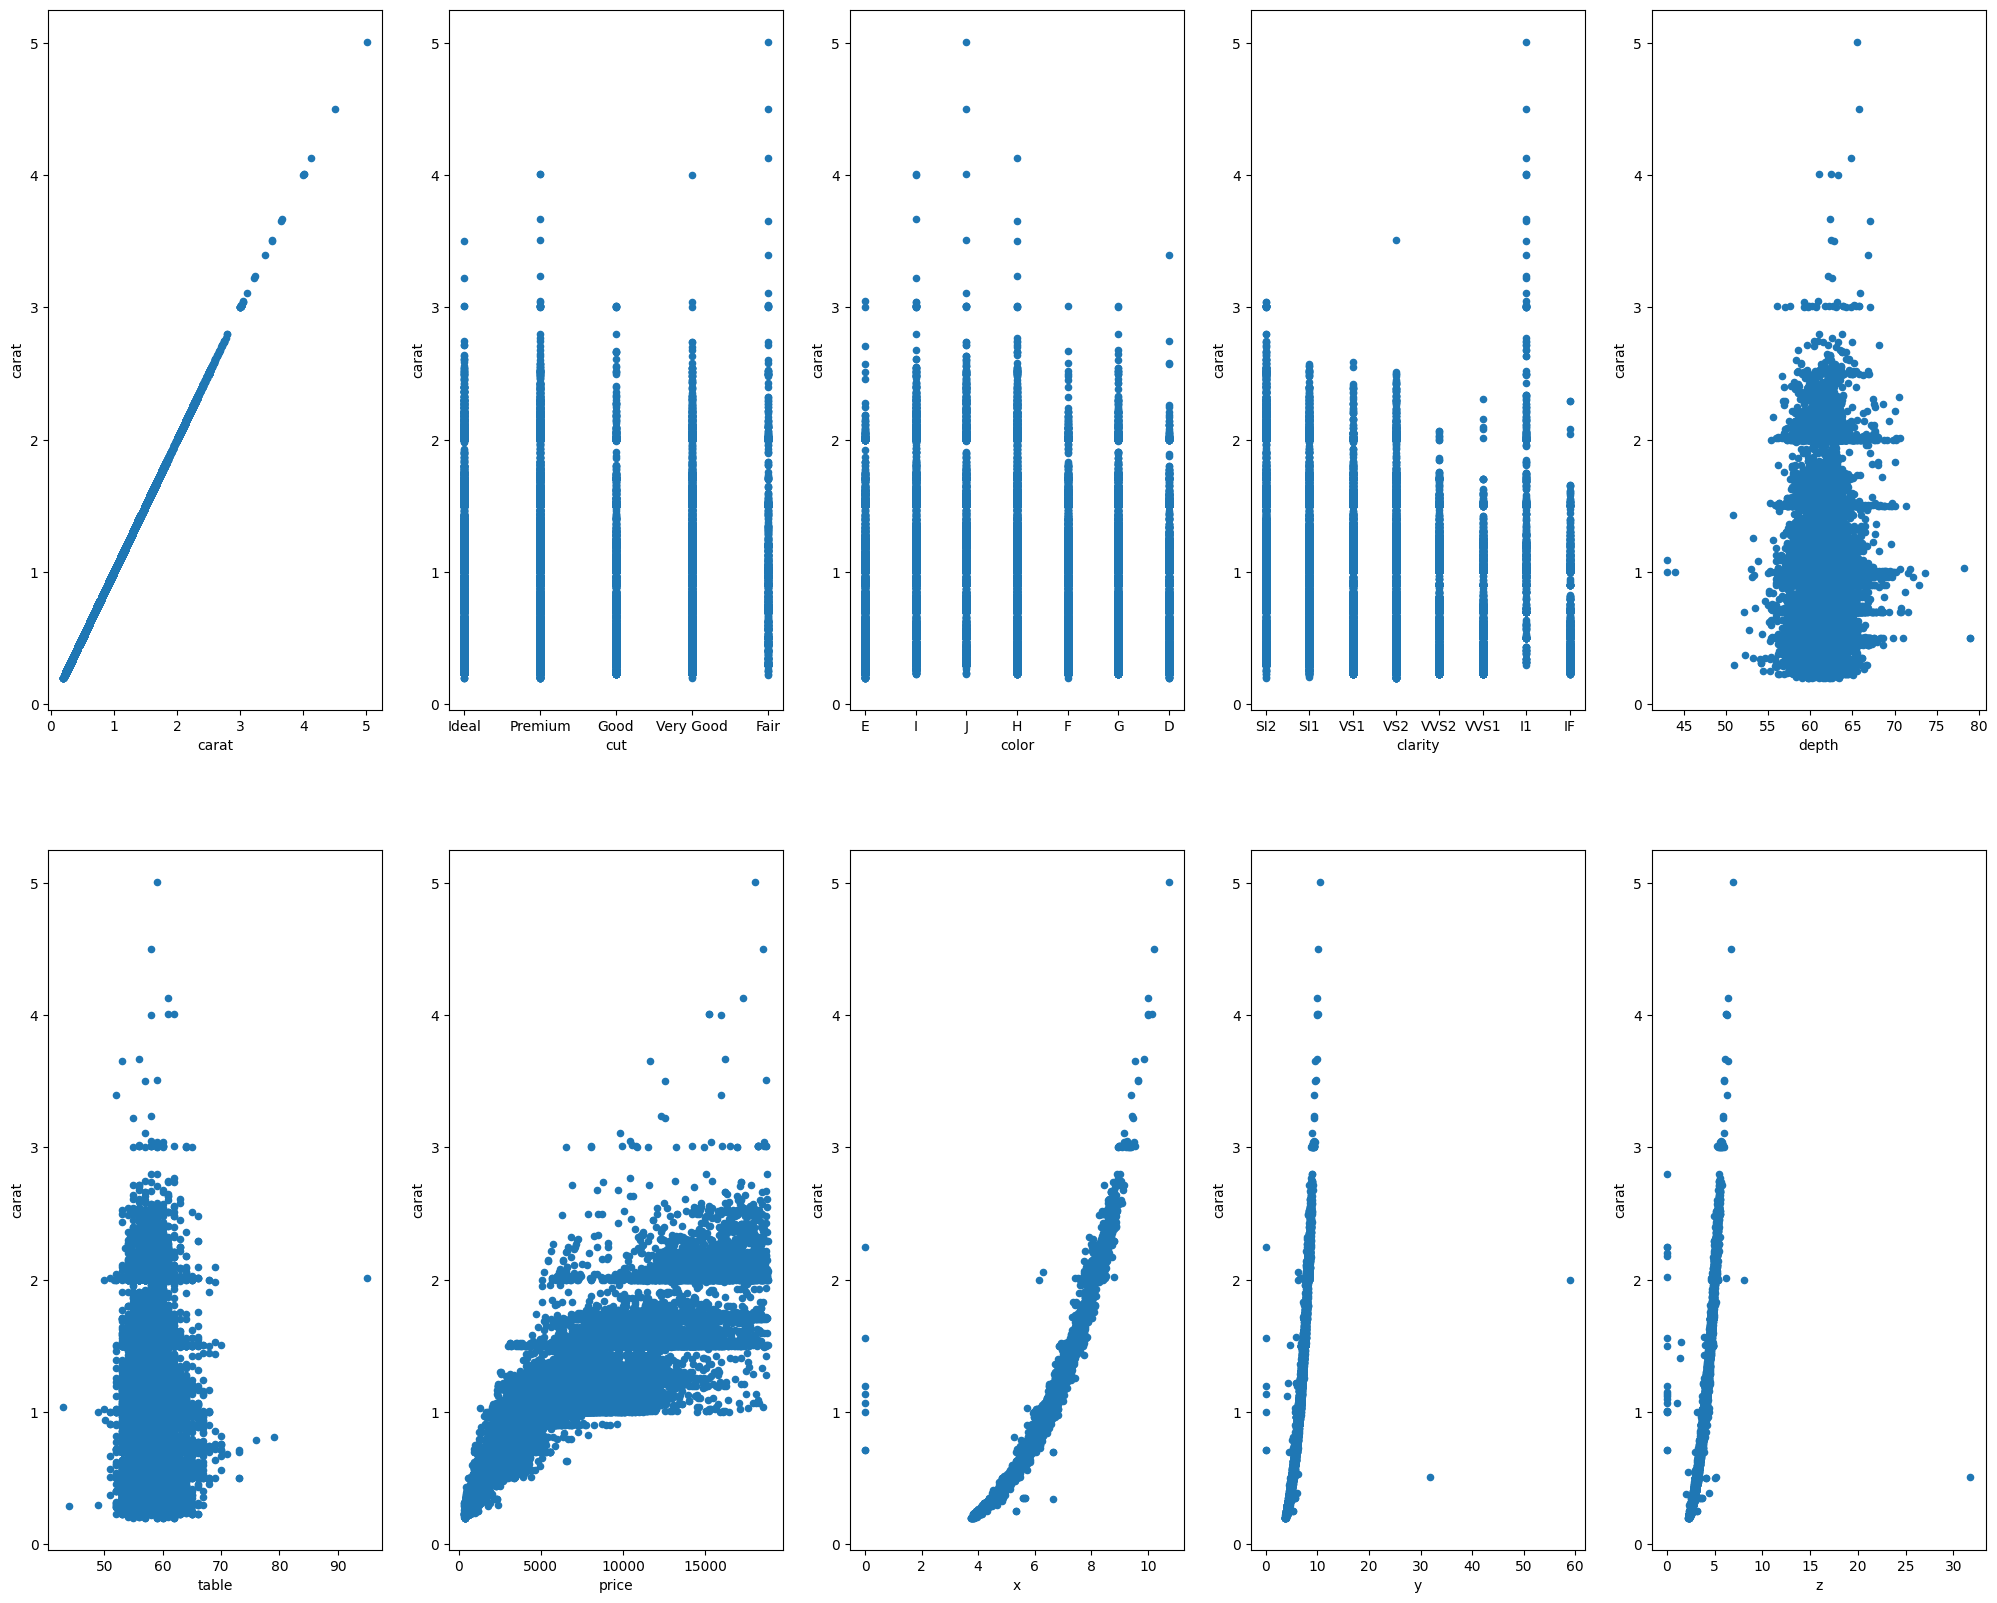

In [41]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 20))
for idx, feature in enumerate(df.columns):
    df.plot(feature, "carat", subplots=True, kind="scatter", ax=axes[idx // 5, idx % 5])

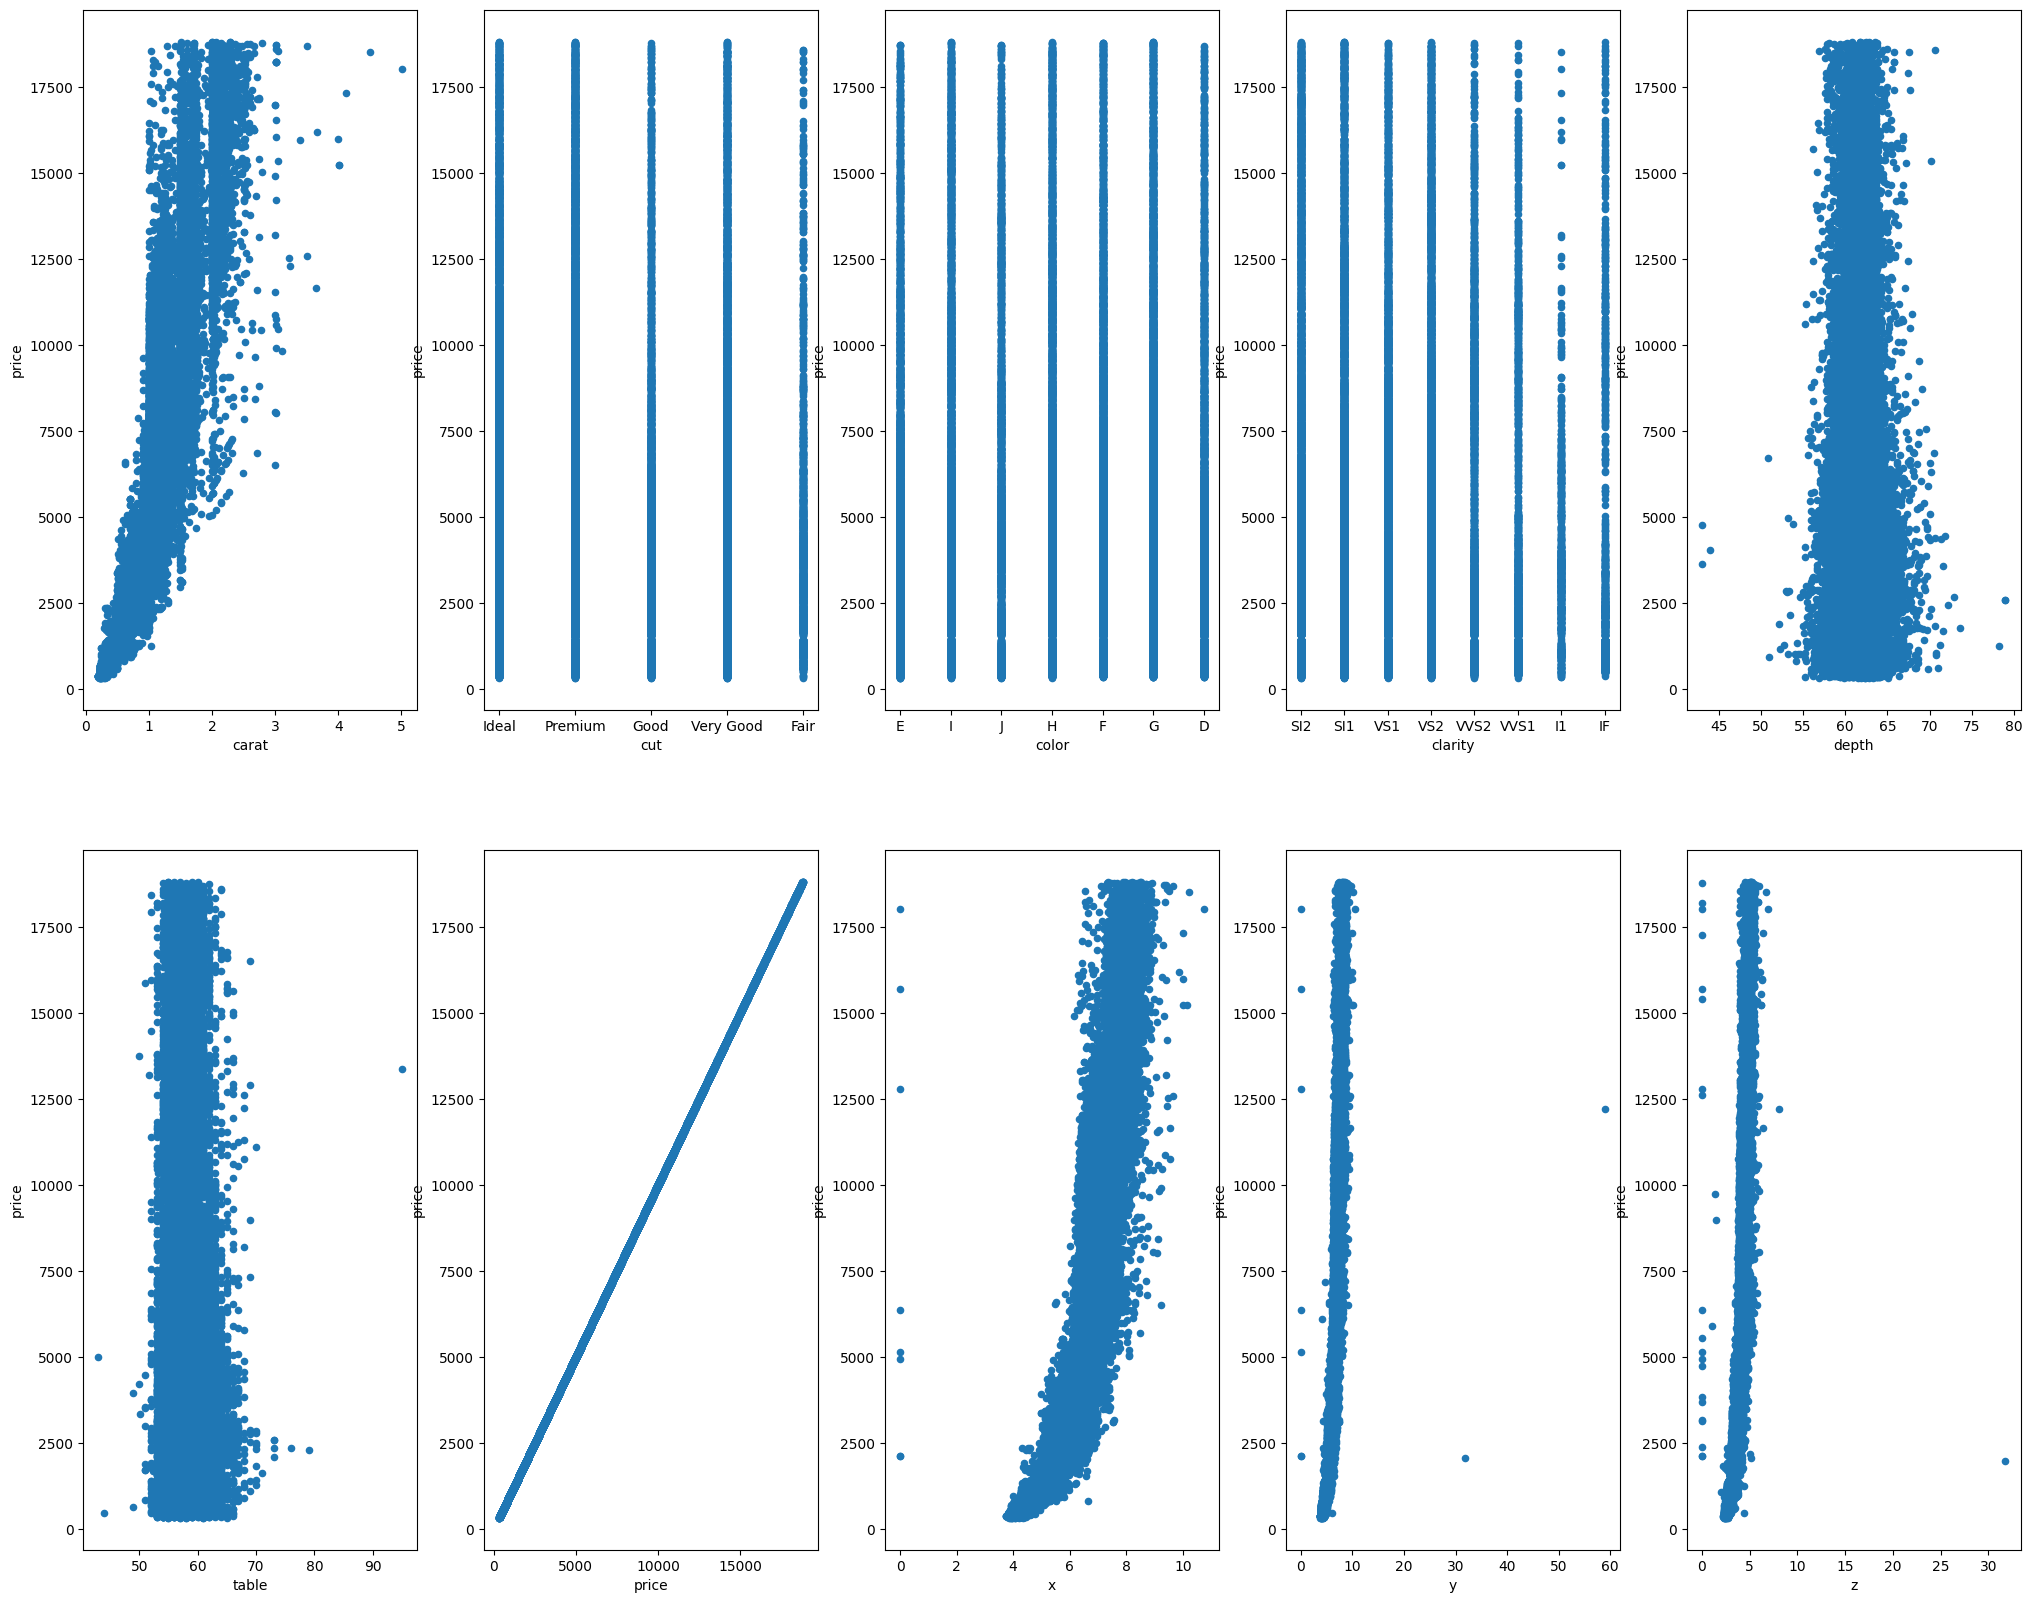

In [42]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 20))
for idx, feature in enumerate(df.columns):
    df.plot(feature, "price", subplots=True, kind="scatter", ax=axes[idx // 5, idx % 5])

In [48]:
if 1:
    le = LabelEncoder()
    for c in cat_cols.columns:
        df[c] = le.fit_transform(cat_cols[c])
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


<Axes: xlabel='carat', ylabel='Density'>

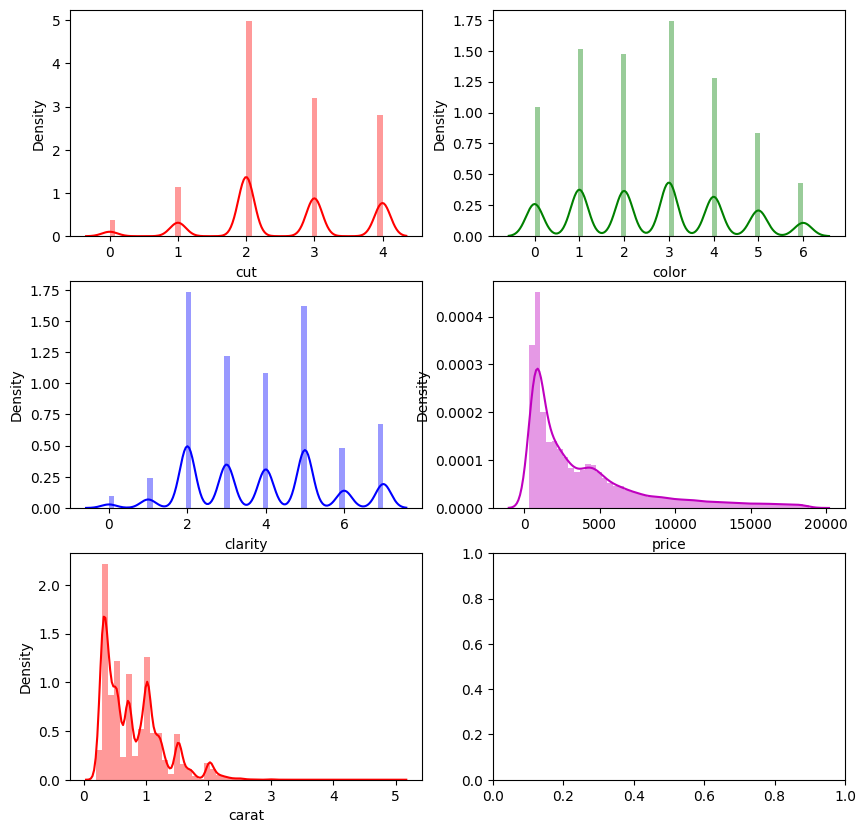

In [55]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
sns.distplot(df['cut'], bins=50, color='r', ax=axes[0, 0])
sns.distplot(df['color'], bins=50, color='g', ax=axes[0, 1])
sns.distplot(df['clarity'], bins=50, color='b', ax=axes[1, 0])
sns.distplot(df['price'], bins=50, color='m', ax=axes[1, 1])
sns.distplot(df['carat'], bins=50, color='r', ax=axes[2, 0])